## CS441: Applied ML - HW 1

## Parts 1-2: MNIST

Include all the code for generating MNIST results below

In [2]:
# initialization code
import numpy as np
from keras.datasets import mnist
%matplotlib inline
from matplotlib import pyplot as plt
from scipy import stats


def load_mnist():
  '''
  Loads, reshapes, and normalizes the data
  '''
  (x_train, y_train), (x_test, y_test) = mnist.load_data() # loads MNIST data
  x_train = x_train[::-1]
  y_train = y_train[::-1]
  x_train = np.reshape(x_train, (len(x_train), 28*28))  # reformat to 784-d vectors
  x_test = np.reshape(x_test, (len(x_test), 28*28))
  maxval = x_train.max()
  x_train = x_train/maxval  # normalize values to range from 0 to 1
  x_test = x_test/maxval
  return (x_train, y_train), (x_test, y_test)

def display_mnist(x, subplot_rows=1, subplot_cols=1):
  '''
  Displays one or more examples in a row or a grid
  '''
  if subplot_rows>1 or subplot_cols>1:
    fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(15,15))
    for i in np.arange(len(x)):
      ax[i].imshow(np.reshape(x[i], (28,28)), cmap='gray')
      ax[i].axis('off')
  else:
      plt.imshow(np.reshape(x, (28,28)), cmap='gray')
      plt.axis('off')
  plt.show()

2025-10-14 21:13:20.877091: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-14 21:13:20.888748: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-14 21:13:21.415246: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-14 21:13:24.578318: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off,

In [3]:
# example of using MNIST load and display  functions
(x_train, y_train), (x_test, y_test) = load_mnist()
# display_mnist(x_train[:10],1,10)
print('Total size: train={}, test ={}'.format(len(x_train), len(x_test)))

Total size: train=60000, test =10000


1. Retrieval, Clustering, and NN Classification

**Retrieval**: Implement the function get_nearest using Euclidean (L2) distance. Check that get_nearest(x_test[0], x_train) returns i=6156. Report the index of the closest example in x_train to x_test[1].

In [4]:
# Retrieval

def get_nearest(X_query, X):
  ''' Return the index of the sample in X that is closest to X_query according
      to L2 distance '''
  # TO DO
  distances = np.linalg.norm(X - X_query, axis=1)
  closest = np.argmin(distances)
  return closest



  

j = get_nearest(x_test[0], x_train)
print(j)
j = get_nearest(x_test[1], x_train)
print(j)

6156
31117


**K-means**: Using your get_nearest function, write a function kmeans that iteratively assigns each data point to the nearest cluster center.  Apply it to only the first 1000 examples, x_train[:1000]. Try this with K = 10 and K = 30, and display the cluster centers after each iteration. Include the displays from after the 1st and 10th iteration for K=30 in your report. See the note in the assignment if your cluster centers do not seem to be changing.


In [4]:
# K-means

def kmeans(X, K, niter=10):
  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''
  # TO DO -- implement kmeans and add code to display cluster centers at each iteration

  cs = X[:K].copy()
  for i in range(niter):
    labels = np.array([get_nearest(x, cs) for x in X])
    cs = np.array([X[labels == i].mean(axis=0) for i in range(K)])

    if i == 1 or i == niter-1:
      display_mnist(cs, 1, K)

  return cs


# K=30
# centers = kmeans(x_train[:1000], K)



**1-NN**: Now, use your get_nearest function to perform 1-nearest neighbor. For each test sample, find the index of the closest sample in the training data to predict its label. To check your method, calculate the error for the first 100 test samples using only the first 1,000 training samples; the error should be 19%. Report the percent error for the first 100 test samples using the first 10,000 training samples.

In [5]:
# 1-NN

# TO DO
def one_nn(x, X):
    return get_nearest(x, X)


def calc_error(X_train, Y_train, X_test, Y_test):
    correct = 0
    false = 0
    for i, x in enumerate(X_test):
        y = Y_train[one_nn(x, X_train)]
        y_true = Y_test[i]

        if y == y_true:
            correct += 1
        else:
            false += 1

    return (false/correct)*100

# check = (calc_error(x_train[:1000], y_train[:1000], x_test, y_test))

# if abs(check - 19) > 1:
#     print(f"Check value got {check}% instead of 19%, possible error")

# work = calc_error(x_train[:10000], y_train[:10000], x_test[:100], y_test[:100])


In [13]:
print(f"Check value: {check}%")
print(f"work value: {work}%")

Check value: 19.402985074626866%
work value: 7.526881720430108%


2. Make it fast

In [5]:
# install libraries you need for part 2
# !apt install libomp-dev
# !pip install faiss-cpu
import faiss
import time

**Retrieval**: Exact search can be performed using the code below.
```
index = faiss.IndexFlatL2(X.shape[1])  # set for exact search
index.add(x_train) # add the data
dist, idx = index.search(x_test[:2],1) # returns index and sq err for each sample
```
Check that idx matches your retrieved indices from Part 1.  

In [6]:
# retrieval

# TO DO (check that you're using FAISS correctly)
index = faiss.IndexFlatL2(x_train.shape[1])
index.add(x_train)
dist, idx = index.search(x_test[:2], 1)

print(dist, idx)

[[ 7.0398464]
 [20.79831  ]] [[ 6156]
 [31117]]


**K-means**: Complete kmeans_fast using FAISS for the retrieval instead of your get_nearest function. In each iteration, create a new index, add the cluster centers, and find the nearest center to all samples.  Once it's working, disable any print or display functions inside the kmeans loop.

Record the root mean squared error (RMSE) at the start of each iteration, and plot the RMSE for each iteration for K=10, K=30, and K=100 when clustering the full training set with 20 iterations. The RMSE for each data point is based on its distance from its assigned cluster center.

In [7]:
# K-means

def get_nearest_faiss(x_query, X):
  index = faiss.IndexFlatL2(X.shape[1])
  index.add(X)
  dist, idx = index.search(np.array([x_query]), 1)
  return dist, idx


In [ ]:

def kmeans_fast(X, K, niter=10):
  '''
  Starting with the first K samples in X as cluster centers, iteratively assign each
  point to the nearest cluster using faiss and compute the mean of each cluster.
  Input: X[i] is the ith sample, K is the number of clusters, niter is the number of iterations
  Output: K cluster centers
  '''

  # TO DO (you can base this on part 1, but use FAISS for search)
  # if you include display code, you need to re-organize the plotting code below

  cs = X[:K].copy()
  for _ in range(niter):
    tups = np.array([get_nearest_faiss(x, cs) for x in X])
    errs, labels = np.array([(e[0][0][0], e[1][0][0]) for e in tups]).T   
    cs = np.array([X[labels == i].mean(axis=0) for i in range(K)])

  return cs, errs

K=10
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=10')

K=30
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=30')

K=100
centers, rmse = kmeans_fast(x_train, K, niter=20)
plt.plot(np.arange(len(rmse)), rmse, label='K=100')
plt.legend(), plt.ylabel('RMSE'), plt.xlabel('# iterations')
plt.show()


**1-NN**: Use FAISS to evaluate 1-NN on the full training and test sets.  Try this with both the exact search and LSH approximate search.  The only difference is how you set up the index.  

For LSH, use:
```
dim = X.shape[1]
index = faiss.IndexLSH(dim, dim)
```

Evaluate 1-NN using each search method, while varying the number of training samples: s in [100,1000, 10000, 60000].  In each case, use x_train[:s] as the train set.  Plot number of samples vs. percent error on a semilogx plot for both exact and LSH (on the same plot).  Also, record timings using `time.time()` and plot samples vs. time on a semilogx plot.

In [17]:
# 1-NN

def one_nn_exact(x, X):
    return get_nearest_faiss(x, X)

def one_nn_lsh(x, X):
    dim = X.shape[1]
    index = faiss.IndexLSH(dim, dim)
    index.add(X)
    dist, idx = index.search(np.array([x]), 1)
    return dist, idx

nsample = [100, 1000, 10000, 60000]
acc_exact = []
acc_lsh = []
timing_exact = []
timing_lsh = []

for s in nsample:
    ae = 0
    al = 0
    te = 0
    tl = 0

    dim = x_train[:s].shape[1]

    index_lsh = faiss.IndexLSH(dim, dim)
    index_lsh.add(x_train[:s])

    index_exact = faiss.IndexFlatL2(dim)
    index.add(x_train[:s])

    for i, tv in enumerate(x_test):
       start = time.time()
       exact_d, exact_l = index_exact.search(np.array([tv]), 1)
       duration = time.time() - start
       te += duration

       start = time.time()
       lsh_d, lsh_l = index_lsh.search(np.array([tv]), 1)
       duration = time.time() - start
       tl += duration

       act = y_test[i] #This is the label of the training sample

       if y_train[exact_l.flatten()[0]] != act: #The LHS is the label of what we think is the nearest neighbour, so if the two match, we're correct.
           ae += 1
       if y_train[lsh_l.flatten()[0]] != act:
           al += 1
    print(f"{s} done\n")
    acc_exact.append(ae / 100)
    acc_lsh.append(al / 100)
    timing_exact.append(te)
    timing_lsh.append(tl)


acc_exact = np.array(acc_exact)
acc_lsh = np.array(acc_lsh)
timing_exact = np.array(timing_exact)
timing_lsh = np.array(timing_lsh)


100 done

1000 done

10000 done

60000 done



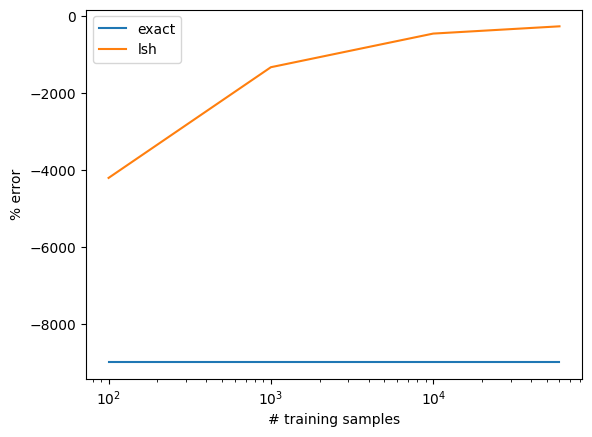

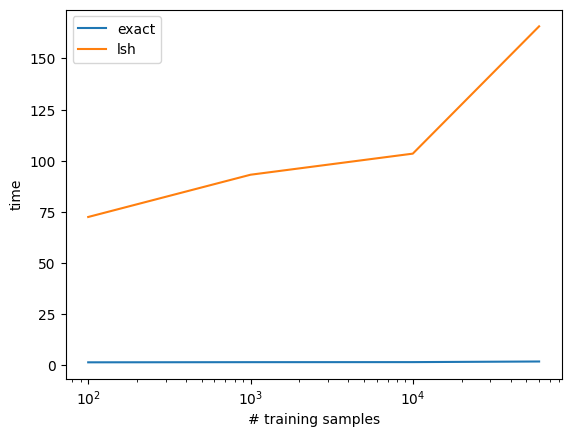

In [18]:

# TO DO

plt.semilogx(nsample, (1-acc_exact)*100, label='exact')
plt.semilogx(nsample, (1-acc_lsh)*100, label='lsh')
plt.legend(), plt.ylabel('% error'), plt.xlabel('# training samples')
plt.show()

plt.semilogx(nsample, timing_exact, label='exact')
plt.semilogx(nsample, timing_lsh, label='lsh')
plt.legend(), plt.ylabel('time'), plt.xlabel('# training samples')
plt.show()


In your report, indicate which label is most often confused with ‘3’ when using the full training set and exact search for 1-NN.  

In [ ]:
# Confusion matrix
import sklearn

# TO DO

## Part 3: Temperature Regression

Include all your code used for part 3 in this section.  

In [ ]:
import numpy as np
from google.colab import drive
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# load data (modify to match your data directory or comment)
def load_temp_data():
  drive.mount('/content/drive')
  datadir = "/content/drive/My Drive/CS441/hw1/"
  T = np.load(datadir + 'temperature_data.npz')
  xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day = \
  T['x_train'], T['y_train'], T['x_val'], T['y_val'], T['x_test'], T['y_test'], T['dates_train'], T['dates_val'], T['dates_test'], T['feature_to_city'], T['feature_to_day']
  return (xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day)

# plot one data point for listed cities and target date
def plot_temps(x, y, cities, feature_to_city, feature_to_day, target_date):
  nc = len(cities)
  ndays = 5
  xplot = np.array([-5,-4,-3,-2,-1])
  yplot = np.zeros((nc,ndays))
  for f in np.arange(len(x)):
    for c in np.arange(nc):
      if cities[c]==feature_to_city[f]:
        yplot[feature_to_day[f]+ndays,c] = x[f]
  plt.plot(xplot,yplot)
  plt.legend(cities)
  plt.plot(0, y, 'b*', markersize=10)
  plt.title('Predict Temp for Cleveland on ' + target_date)
  plt.xlabel('Day')
  plt.ylabel('Avg Temp (C)')
  plt.show()




In [ ]:
# load data (use xt and yt so that we aren't replacing the MNIST variables)
(xt_train, yt_train, xt_val, yt_val, xt_test, yt_test, dates_train, dates_val, dates_test, feature_to_city, feature_to_day) = load_temp_data()
''' Data format:
      x_train, y_train: features and target value for each training sample (used to fit model)
      x_val, y_val: features and target value for each validation sample (used to select hyperparameters, such as regularization and K)
      x_test, y_test: features and target value for each test sample (used to evaluate final performance)
      dates_xxx: date of the target value for the corresponding sample
      feature_to_city: maps from a feature index to the city
      feature_to_day: maps from a feature index to a day relative to the target value, e.g. -2 means two days before
      Note: 361 is the feature index for the temperature of Cleveland on the previous day
'''
f = 361
print('Feature {}: city = {}, day= {}'.format(f,feature_to_city[f], feature_to_day[f]))
baseline_rmse = np.sqrt(np.mean((yt_val[1:]-yt_val[:-1])**2)) # root mean squared error example
print('Baseline - prediction using previous day: RMSE={}'.format(baseline_rmse))

# plot first two x/y for val
plot_temps(xt_val[0], yt_val[0], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[0])
plot_temps(xt_val[1], yt_val[1], ['Cleveland', 'New York', 'Chicago', 'Denver', 'St. Louis'], feature_to_city, feature_to_day, dates_val[1])



**KNN Regression**: Perform 5-NN regression, reporting RMSE for two variants:


1.   Original features
2.   Normalize the features by subtracting the previous day’s Cleveland temperature. I.e., if previous day’s Cleveland temperature is `c`, features are `X`, and value to predict is `y`, then predict `y_query-c = NN(X_query, X-c, y-c)`

For these experiments, train on (xt_train, yt_train) and test on (xt_test, yt_test). To validate your method, if you set `K=3`, you should get an RMSE of `3.314` for the original features.


In [ ]:
# K-NN Regression

def regress_KNN(X_trn, y_trn, X_tst, K=1):
  '''
  Predict the target value for each data point in X_tst using a
  K-nearest neighbor regressor based on (X_trn, y_trn), with L2 distance.
  Input: X_trn[i] is the ith training data. y_trn[i] is the ith training label. K is the number of closest neighbors to use.
  Output: return y_pred, where y_pred[i] is the predicted ith test value
  '''
  # TO DO

def normalize_features(x, y, fnum):
  ''' Normalize the features in x and y.
      For each data sample i:
        x2[i] = x[i]-x[i,fnum]
        y2[i] = y[i]-x[i,fnum]
  '''
  # TO DO



# KNN with original features

# TO DO

# KNN with normalized features
fnum = 361 # previous day temp in Cleveland

# TO DO

# KNN with normalized features


## Part 5: Stretch Goals
Include all your code used for part 5 in this section. You can copy-paste code from parts 1-3 if it is re-usable.

Compare K-NN on the MNIST classification for N=1, 3, 5, 11, 25. For these tests, use x_train[:50000] as a training set and x_train[50000:] as a validation set.  Report error on the validation set for all parameters. Then performance on the test set for the best parameter using the full training set.

When K is greater than 1, return the most common label of the nearest samples.  *If there 	is a tie, return the most common label with the closest sample.*

In [ ]:
# Stretch: KNN classification (Select K)



Compare K-NN on the temperature regression dataset for N=1, 3, 5, 11, 25 using both feature types. Report all results on the validation set, and then run the single best setting on the test set.

In [ ]:
# Stretch: KNN regression (Select K)

In [ ]:
# from https://gist.github.com/jonathanagustin/b67b97ef12c53a8dec27b343dca4abba
# For use in Colab.  For local, just use jupyter nbconvert directly

import os
# @title Convert Notebook to PDF. Save Notebook to given directory
NOTEBOOKS_DIR = "/content/drive/MyDrive/CS441/hw1" # @param {type:"string"}
NOTEBOOK_NAME = "CS441_HW1_Solution.ipynb" # @param {type:"string"}
#------------------------------------------------------------------------------#
from google.colab import drive
drive.mount("/content/drive/", force_remount=True)
NOTEBOOK_PATH = f"{NOTEBOOKS_DIR}/{NOTEBOOK_NAME}"
assert os.path.exists(NOTEBOOK_PATH), f"NOTEBOOK NOT FOUND: {NOTEBOOK_PATH}"
!apt install -y texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!apt install pandoc > /dev/null 2>&1
!jupyter nbconvert "$NOTEBOOK_PATH" --to pdf > /dev/null 2>&1
NOTEBOOK_PDF = NOTEBOOK_PATH.rsplit('.', 1)[0] + '.pdf'
assert os.path.exists(NOTEBOOK_PDF), f"ERROR MAKING PDF: {NOTEBOOK_PDF}"
print(f"PDF CREATED: {NOTEBOOK_PDF}")